In [1]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas openml
!pip install openml
!pip install cvxopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 12.0 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.13.1-py3-none-any.whl size=142784 sha256=3dc644e37f74239893823e002196ed6af8f519b641c36399edaa39824f2d8c76
  Stored in directory: /root/.cache/pip/wheels/f7/7a/fa/f73edc5ccecbab13bbf5fb888f2f943720f77114a1fa4ceffe
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=fc050bd411a2bb18e10b448416d48bd03cc56f737e7b048bb05924d5c9f6b46a
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 68.5 MB/s eta 0:00:00

[no

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List
import openml

from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

import sklearn
from sklearn import metrics

from mpl_toolkits import mplot3d
np.random.seed(42)

# Práctica 6: Máquinas de Vectores de Soporte

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones.

La entrega de la práctica será en la siguiente sesión a menos que la indicación sea otra. La revisión iniciará al iniciar la sesión y únicamente podrá ser evaluada durante la duración de la sesión.

## Asignación 1

Genera un dataset de clasificación binaria $\pm1$, de veinte instancias, aleatorio, de dos características, que sea linealmente separable. Grafique el dataset generado y coloree los puntos deacuerdo a su etiqueta.

In [3]:
def generate_data(
    n_dims: int=2,
    n_samples: int=20,
    distribution: str = 'uniform',
    parametros: dict[str, float] = {'low': 0, 'high': 20}
) -> np.array:
    """
    Descripción:
    Esta funcion genera datos artificiales muestreados de una distribución de probabilidad especificada.
    
    Entradas:
    - n_dims: Número de dimensiones (características) que contendrá cada ejemplo 
    - n_samples: Número de muestreos (ejemplos) que deberán ser generados
    - from_distribution: Distribución de la que deberán ser muestreados los puntos, "normal" o "uniform"   
    - distribution_params: Parámetros para la distribución de la que serán muestradas los valores.
        "uniform": {
            "low": El número mínimo que puede ser muestreado
            "high": El número máximo que puede ser muestreado
            }
        "normal": {
            "mean": La media que tendrá la distribución normal
            "std": La desviación estándar de la distribución normal
            }
            
    Salidas:
    - Un arreglo de numpys muestreado de la distribución seleccionada con dimensiones (n_samples, n_dims)
    """
    # examples = np.random((n_samples, n_dims))
    np.random.seed(1509345)

    # CÓDIGO AQUÍ

    if distribution == "uniform":
        low = parametros.get("low", 0)
        high = parametros.get("high", 1)
        examples = np.random.uniform(low, high, size=(n_samples, n_dims))

    elif distribution == "normal":
        mean = parametros.get("mean", 0)
        std = parametros.get("std", 1)
        examples = np.random.normal(mean, std, size=(n_samples, n_dims))

    return examples


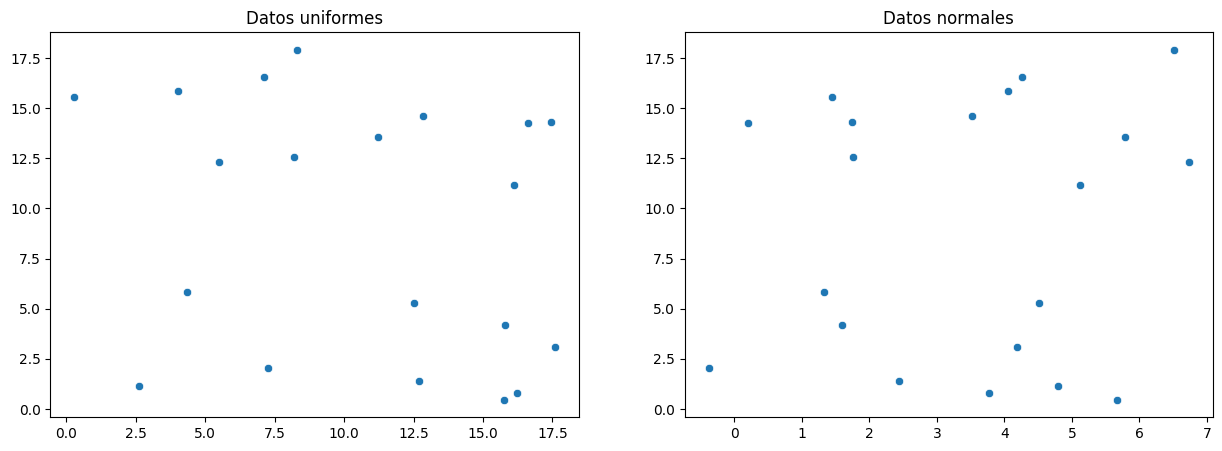

In [4]:
uniform = generate_data()

normal = generate_data(
    distribution="normal", 
    parametros={"mean": 3., "std": 2.}
)

fig, axs = plt.subplots(ncols= 2, figsize =(15,5))
axs[0].set_title('Datos uniformes')
axs[1].set_title('Datos normales')
a = sns.scatterplot(x = uniform[:, 0], y= uniform[:, 1], ax=axs[0])
b = sns.scatterplot(x=normal[:, 0], y=uniform[:,1], ax=axs[1])

In [5]:
def label_data(
    data: np.array,
    model: np.array = None
) -> np.array:
    """
    Descripción:
    Esta funcion genera el etiquetado de datos artificiales de acuerdo a un modelo generado. 
    En caso de no ser recibido como parámetro, el modelo debe ser generado aleatoriamente de 
    una distribución normal con media 0 y varianza 1.
    
    Entradas:
    - data: Datos a etiquetar de dimensiones Número de dimensiones (# ejemplos, # características)
    - model: Modelo utilizado para etiquetar
            
    Salidas:
    - Un arreglo de numpy referente a las etiquetas asignadas a cada ejemplo recibido en la entrada "data".
    - Un arreglo de numpy referente al modelo generado aleatoriamente.
    """

    labels = np.zeros((data.shape[0],))
    # if model is None:
    #     model = __random_fn__((data.shape[1] + 1,))

    # CÓDIGO AQUÍ
    if model is None:
        np.random.seed(1509345)
        model = np.random.normal(
            loc=0,
            scale=1,
            size=data.shape[1] + 1
        )

    data = np.concatenate((np.ones((data.shape[0], 1)), data), axis=1)

    predictions = np.tanh(np.dot(data, model))
    labels[predictions >= 0] = 1
    labels[predictions < 0] = -1

    return labels, model


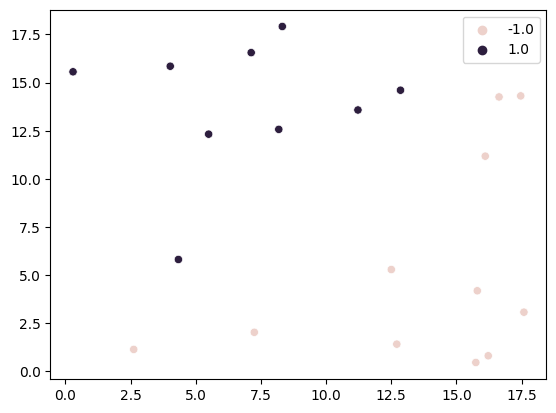

In [6]:
__labels__, __model__ = label_data(uniform)

assert __labels__.shape == (20,)
assert __model__.shape == (2 + 1,)

_ = sns.scatterplot(x=uniform[:, 0], y=uniform[:, 1], hue=__labels__)


In [7]:
def simplified_smo(
    C: float, 
    tol: float, 
    X: np.array, 
    y: np.array, 
    max_passes: int = 100
) -> np.array:
    """Algoritmo de Support Vector Machine simplificado.

    Args:
        C (float): Parametro de regularización (0.1, 1, 10, 100, etc.)
        tol (float): Valor de tolerancia (0.001, 0.0001)
        X (np.array): valores que queremos separar
        y (np.array): Etiqueta de los valores de x
        max_passes (int, optional): Número de veces que repite el algoritmo. Defaults to 100.

    Returns:
        alpha : valores de lagrange que es la solucion
        b : Umbral para la solución o intersección entre datos
    """
    # Inicializamos m, n para no hacerlo despues
    m, n = X.shape
    # Creamos un arreglo donde se almacenan los valores de alpha
    alpha = np.zeros(m)
    b = 0
    passes = 0

    while passes < max_passes:
        num_changed_alphas = 0
        for i in range(m):
            # Calculo del ei y el kernel al mismo tiempo usando el producto punto
            E_i = np.dot(alpha * y, np.dot(X, X[i])) + b - y[i]
            # Verificamos la condición de KKT (Kernel Karush-Kuhn-Tucker)
            if (y[i] * E_i < -tol and alpha[i] < C) or (
                y[i] * E_i > tol and alpha[i] > 0
            ):
                # Generamos un indice aleatorio
                j = np.random.choice(np.delete(np.arange(m), i))
                # calculamos el e_j
                E_j = np.dot(alpha * y, np.dot(X, X[j])) + b - y[j]
                # guardamos el valor antiguo de los alpha
                alpha_i_old, alpha_j_old = alpha[i], alpha[j]
                # Calcular los límites de alpha[j] para que satisfagan las restricciones
                if y[i] != y[j]:
                    L = max(0, alpha[j] - alpha[i])
                    H = min(C, C + alpha[j] - alpha[i])
                else:
                    L = max(0, alpha[i] + alpha[j] - C)
                    H = min(C, alpha[i] + alpha[j])
                # Si L = H, no se puede hacer nada
                if L == H:
                    continue
                # Calcular el valor no restringido de alpha[j]
                eta = 2 * np.dot(X[i], X[j]) - np.dot(X[i], X[i]) - np.dot(X[j], X[j])
                if eta >= 0:
                    continue
                # Calcular y recortar el nuevo valor de alpha[j]
                alpha[j] = alpha[j] - (y[j] * (E_i - E_j)) / eta
                alpha[j] = np.clip(alpha[j], L, H)
                # Calcular los valores de b para los nuevos valores de alpha[i] y alpha[j]
                if abs(alpha[j] - alpha_j_old) < 1e-5:
                    continue
                alpha[i] = alpha[i] + y[i] * y[j] * (alpha_j_old - alpha[j])
                b_i = (
                    b
                    - E_i
                    - y[i] * (alpha[i] - alpha_i_old) * np.dot(X[i], X[i])
                    - y[j] * (alpha[j] - alpha_j_old) * np.dot(X[i], X[j])
                )
                b_j = (
                    b
                    - E_j
                    - y[i] * (alpha[i] - alpha_i_old) * np.dot(X[i], X[j])
                    - y[j] * (alpha[j] - alpha_j_old) * np.dot(X[j], X[j])
                )
                if 0 < alpha[i] < C:
                    b = b_i
                elif 0 < alpha[j] < C:
                    b = b_j
                else:
                    b = (b_i + b_j) / 2
                num_changed_alphas += 1
        # Si no se hacen cambios en el ciclo, salimos del while
        # Si no, aumentamos el contador de pasos
        if num_changed_alphas == 0:
            passes += 1
        else:
            passes = 0
    return alpha, b


In [8]:
alpha, b = simplified_smo(10, 0.0001, uniform, __labels__, 1000)
print(alpha)
print(b)
print(len(__labels__))
print

[0.         0.         0.         0.09240755 0.         0.30654723
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.39903916 0.         0.
 0.         0.        ]
-0.14347741571384676
20


<function print>

In [9]:
def plot_separating_hyperplane(
    alpha: np.array, 
    x: np.array, 
    y: np.array, 
    b: float
) -> None:
    """Función para graficar los puntos y el hiperplano que separa dicho puntos

    Args:
        alpha (np.array): valores de alpha optimizados
        x (np.array): valores que queremos separar
        y (np.array): etiquetas de los valores
        b (float): valor de interseccion del hiperplano
    """
    # Calcular la pendiente de la recta
    uniform = np.tile(alpha * y, (x.shape[1], 1)).T * x
    print((alpha * y).shape)
    print(alpha.shape)
    print(y.shape)
    w = np.sum(uniform, axis=0)

    # plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")
    # # Graficar los vectores de soporte
    # plt.scatter(
    #     x[alpha > 1e-6, 0], x[alpha > 1e-6, 1], s=150, facecolors="none", edgecolors="k"
    # )

    # Graficar la recta
    xp = np.linspace(np.min(x[:, 0]), np.max(x[:, 0]), 100)
    yp = -(w[0] * xp + b) / w[1]
    plt.plot(xp, yp, "k-")
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k", label='Datos')
    plt.scatter(x[alpha > 1e-6, 0], x[alpha > 1e-6, 1], s=150, facecolors="none", edgecolors="k", label='Vectores de soporte')
    plt.plot(xp, yp, "k-", label='Línea de separación')
    plt.legend(bbox_to_anchor =(0.90, 1.0), ncol = 1)
    plt.title('Valores separados por el hiperplano')


    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    # plt.axis("tight")
    plt.show()

(20,)
(20,)
(20,)


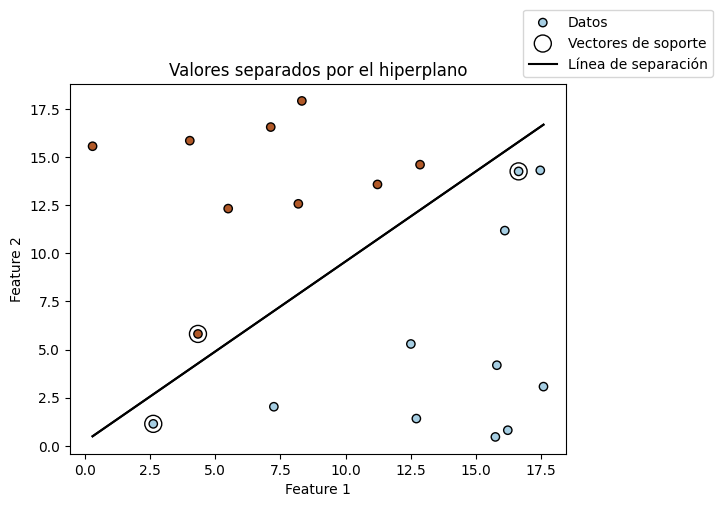

In [10]:
plot_separating_hyperplane(alpha, uniform, __labels__, b)

## Asignación 2

Genera un dataset de clasificación binaria $\pm1$, de veinte instancias, aleatorio, de dos características, que contenga todos los puntos de una clase entre dos parábolas y los puntos por arriba o por debajo de estas parábolas pertenezcan a la otra clase. Grafique el dataset generado y coloree los puntos deacuerdo a su etiqueta.

![Picture title](image-20230518-191459.png)

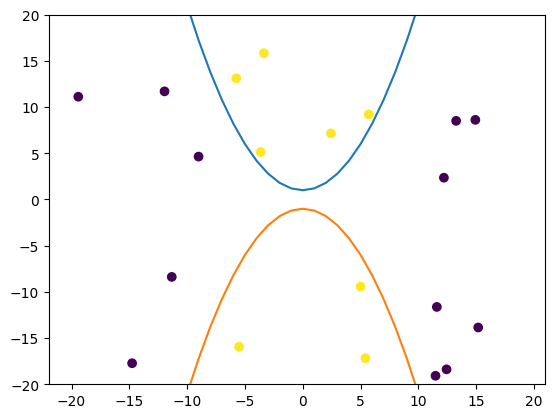

In [11]:
def parabola(x, y):
    y1 = 0.2 * x ** 2 + 1
    y2 = -0.2 * x ** 2 - 1

    # Inside of
    if (y1 <= y ) or (y2 >= y ):
        return 1
    else:
        return -1


# Generar un conjunto de datos aleatorio de 20 instancias con dos características
# np.random.seed(0)
X_parab = generate_data(n_samples=20,parametros={'low':-20,'high':20})

# Clasificar los puntos en dos clases
y_parab = np.zeros(20)
for i in range(20):
    y_parab[i] = parabola(X_parab[i, 0], X_parab[i, 1])

# y=list()
# for i in range(-10, 10):
#     y.append(0.2*(i**2)+1)

# y_neg = list()
# for i in range(-5,5):
#     y_neg.append(-0.2*(i**2)-1)
def f1 (x):
    return 0.2*x**2+1
def f2(x):
    return -0.2*x**2-1

x = range(-20, 20)
# Crear un gráfico de dispersión que muestre los puntos y su etiqueta
fig, ax = plt.subplots(ncols=1)
ax.scatter(X_parab[:, 0], X_parab[:, 1], c=y_parab)
ax.plot(x,[f1(i) for i in x])
ax.plot(x,[f2(i) for i in x])
plt.ylim([-20, 20])
plt.show()



In [12]:
alpha_parab, b_parab = simplified_smo(0.01, 0.01, X_parab, y_parab, 10000)


(20,)
(20,)
(20,)


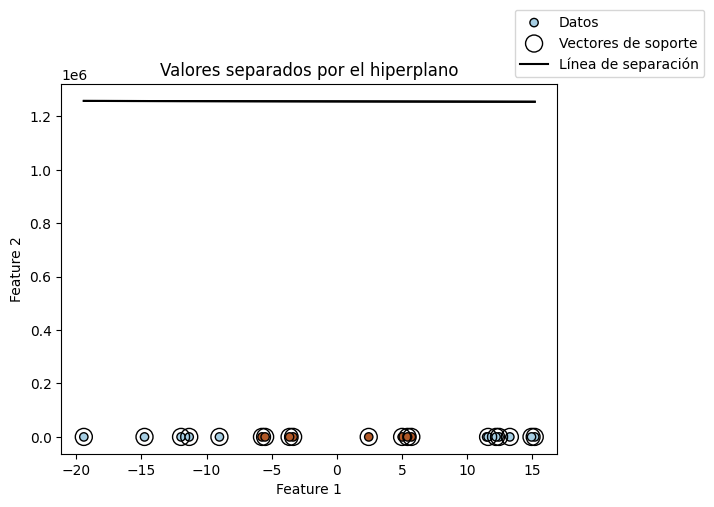

In [13]:
plot_separating_hyperplane(alpha_parab, X_parab, y_parab, b_parab)


## Asignación 3

Implemente una clase que permita ajustar un modelo de Máquinas de Vectores de Soporte. La clase debe cumplir con los siguientes requisitos:

- Debe contar con un método para realizar el entrenamiento en caso de ser requerido.
- Debe contar con un método para realizar las predicciones.
- Debe de poder utilizar un kernel polinomial o de Radial Base function (RBF).
- Debe almacenar los vectores de soporte.

In [21]:
class SVM:
    """ 
    El Kernel puede ser lineal o poly
    g -> representa el grado del polinomio
    """
    def __init__(self, kernel = 'lineal', degree = 2): 
        self.X = 0
        self.y = 0
        self.b = 0
        self.alpha = 0
        self.S = 0
        self.S_index = 0
        self.kernel = kernel
        self.degree = degree

    def label_data(self, data):
        new_class = np.zeros(len(data))

        for i, value in enumerate(data):
            if value >= 0:
                new_class[i] = 1
            else:
                new_class[i] = -1

        return new_class

    def _kernel (self, a , b):
        
        if self.kernel == "lineal":
            return np.dot(a, b)

        if self.kernel == "poly":
            return (1 + np.dot(a, b))**(self.degree)
        

    def fit(self, X, y):
        self.X = X
        self.y = y
    
        # implementación Non-Linear Hard-Margin Support Vector Machines

        # Construir Q_D y A_D
        n = self.X.shape[0]
        Q_D = np.zeros((n, n))
        A_D = np.zeros

        for i in range(n):
            for j in range(n):
                Q_D[i][j] = (self.y[i] * self.y[j]) * self._kernel(self.X[i], self.X[j]) #(np.dot(self.X[i], self.X[j]))

        print(Q_D)

        A_D = self.y.T
        A_D = np.vstack((A_D, -self.y.T))
        A_D = np.vstack((A_D, np.eye(n)))

        # Optimizar el Problema dual

        # Converting into cvxopt format
        P = cvxopt_matrix(Q_D)
        q = cvxopt_matrix(-np.ones((n, 1)))
        G = cvxopt_matrix(-np.eye(n))
        h = cvxopt_matrix(np.zeros(n))
        A = cvxopt_matrix(y.reshape(1, -1))
        b = cvxopt_matrix(np.zeros(1))

        sol = cvxopt_solvers.qp(P, q, G, h, A, b)
        self.alpha = np.array(sol["x"])
        # print(self.alpha)

        # Let S be a support vector for which alpha > 0
        self.S_index = np.where(self.alpha > 1e-6)[0]

        # Compute b
        if len(self.S_index) == 0:
            print("No se encontraron vectores de soporte")
        else:
            index = np.random.choice(self.S_index)
            sumatoria = 0
            for j in self.S_index:
                sumatoria += (
                    self.alpha[j] * y[j] * self._kernel(self.X[j], self.X[index])#(np.dot(X[j], X[index]))
                ) 
            self.b = y[index] - sumatoria
     

    def predict (self, X) :
        # Get classes
        new_class = []
        for i in range(len(X)):
            sumatoria = 0
            for j in self.S_index:
                sumatoria += self.alpha[j] * self.y[j] * self._kernel(self.X[j], X[i]) #(np.dot(X[j], X[i]))
            new_class.append(sumatoria + self.b)

        label = self.label_data(new_class)

        #print(label)
        # Matriz de confusión
        confusion_matrix = metrics.confusion_matrix(self.y, label)
        cm_display = metrics.ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix,
            display_labels=["-1", "1"],
        )
        cm_display.plot()
        plt.show()
        

        return label
    
    def plot_separating_hyperplane(self, pred_lab):
        """Función para graficar los puntos y el hiperplano que separa dicho puntos

        Args:
            alpha (np.array): valores de alpha optimizados
            x (np.array): valores que queremos separar
            y (np.array): etiquetas de los valores
            b (float): valor de interseccion del hiperplano
        """
        #print(self.alpha.flatten().shape)
        #print(self.y.shape)
        #print((self.alpha * self.y).shape)
        # Calcular la pendiente de la recta
        uniform = np.tile(self.alpha.flatten() * self.y, (self.X.shape[1], 1)).T * self.X
        w = np.sum(uniform, axis=0)

        # plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")
        # # Graficar los vectores de soporte
        # plt.scatter(
        #     x[alpha > 1e-6, 0], x[alpha > 1e-6, 1], s=150, facecolors="none", edgecolors="k"
        # )

        # Graficar la recta
        # xp = np.linspace(np.min(self.X[:, 0]), np.max(self.X[:, 0]), 100)
        # yp = -(w[0] * xp + self.b) / w[1]
        # plt.plot(xp, yp, "k-")
        plt.scatter(self.X[:, 0], self.X[:, 1], c=pred_lab, cmap=plt.cm.Paired, edgecolors="k", label='Datos')
        plt.scatter(self.X[self.S_index, 0], self.X[self.S_index, 1], s=150, facecolors="none", edgecolors="k", label='Vectores de soporte')
        # plt.plot(xp, yp, "k-", label='Línea de separación')
        plt.legend(bbox_to_anchor =(0.90, 1.0), ncol = 1)
        plt.title('Valores separados por el hiperplano')
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        # plt.axis("tight")
        plt.show()



## Kernel lineal - Datos linealmente separables

[[ 318.76342473 -119.44717728  287.73212613  336.34409566  278.28006795
    49.58739591  351.13062095  236.11570956 -270.93857545 -201.38248843
   290.72874415 -134.49398498  317.58469578 -182.57568523  -52.96631123
   -94.10161482 -239.06823185 -176.21513168  227.90634511  133.67399952]
 [-119.44717728  267.39344085  -78.04651262 -292.82762998  -70.61072756
   -28.59596593 -297.0283381  -134.10404845  283.15850204  317.404783
  -129.88371606  217.38163616 -241.93953109  232.1409132   247.80550744
   109.53247781  260.31510422  291.07775872  -73.52021019  -61.28748322]
 [ 287.73212613  -78.04651262  263.70314836  281.29635574  255.69196594
    43.42087826  294.8226384   207.02848303 -220.27350696 -149.42340003
   259.62608357  -99.07055816  270.22831936 -142.90723108  -17.32554547
   -75.00878681 -192.96347754 -128.9655826   207.30871866  119.16359508]
 [ 336.34409566 -292.82762998  281.29635574  479.85175875  268.40576221
    59.82496017  494.44982357  283.32062792 -421.9564929  -393.

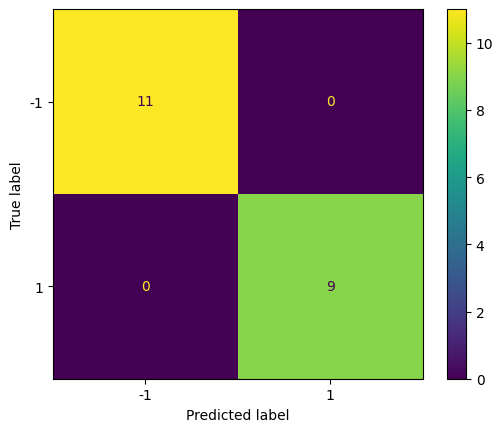

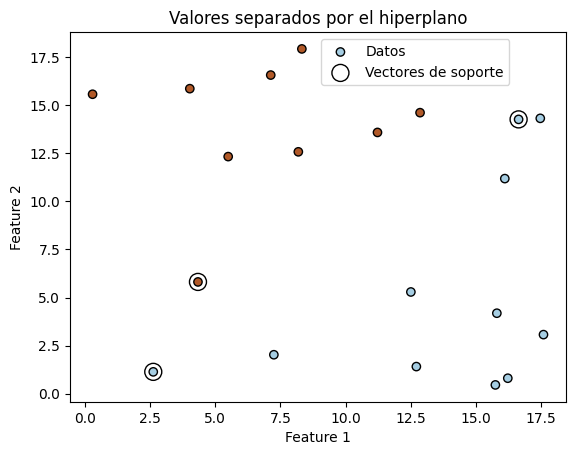

In [22]:
clasificador = SVM(kernel = "lineal")
clasificador.fit(uniform, __labels__)
predicted = clasificador.predict(uniform)
clasificador.plot_separating_hyperplane(predicted)

## Kernel polinomial - Datos linealmente separables

[[ 3.26953778e+07 -1.74739014e+06  2.40705119e+07  3.83901085e+07
   2.17831070e+07  1.29457427e+05  4.36627794e+07  1.33315604e+07
  -2.01100178e+07 -8.28931789e+06  2.48277674e+07 -2.48748258e+06
   3.23351387e+07 -6.18650650e+06 -1.57169474e+05 -8.60129165e+05
  -1.38357938e+07 -5.56547717e+06  1.19942610e+07  2.44259393e+06]
 [-1.74739014e+06  1.93337320e+07 -4.93910369e+05 -2.53675133e+07
  -3.67226707e+05 -2.59237340e+04 -2.64711423e+07 -2.46606823e+06
   2.29446778e+07  3.22803882e+07 -2.24210967e+06  1.04147379e+07
  -1.43381978e+07  1.26723010e+07  1.54021010e+07  1.35042266e+06
   1.78440544e+07  2.49169834e+07 -4.13830231e+05 -2.41658652e+05]
 [ 2.40705119e+07 -4.93910369e+05  1.85471558e+07  2.24965445e+07
   1.69136301e+07  8.76519178e+04  2.58877448e+07  9.00260938e+06
  -1.08339857e+07 -3.40366025e+06  1.77032757e+07 -1.00211824e+06
   1.99528574e+07 -2.98021675e+06 -6.15418761e+03 -4.39128275e+05
  -7.29726110e+06 -2.19525550e+06  9.03904071e+06  1.73507695e+06]
 [ 3.83

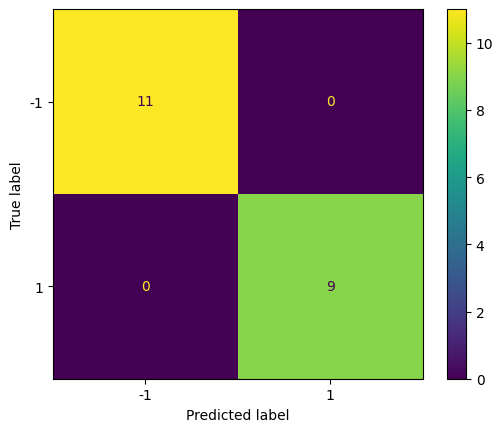

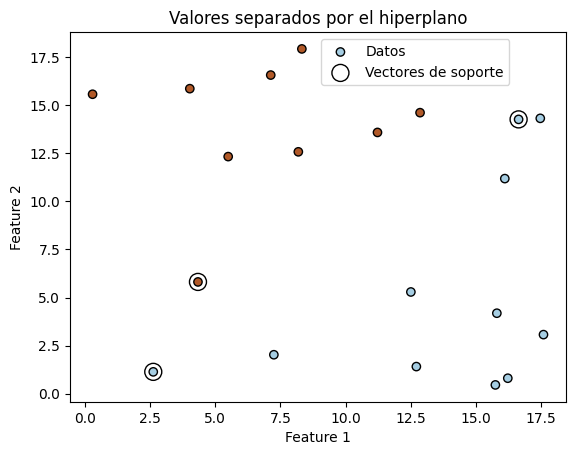

In [23]:
clasificador_ = SVM(kernel = "poly", degree = 3)
clasificador_.fit(uniform, __labels__)
predicted = clasificador_.predict(uniform)
clasificador_.plot_separating_hyperplane(predicted)

## Kernel lineal - Datos de parábola

[[ 422.19228278 -343.51287596  443.40322631   83.44106749  438.58659228
    21.53298034  107.17192201 -206.44013342   40.95002851  270.2776689
   337.09806251 -201.05689336  152.62108784  126.28737    -448.67934059
   -55.8528243    62.04730637  268.87544267 -320.21373501 -137.29809512]
 [-343.51287596  279.8320094  -363.77939665  -59.06496417 -360.53093821
   -30.8729085   -77.67737831  170.04667991  -39.48950895 -225.37134046
  -274.72221877  162.05354245 -118.39973984 -103.53337294  362.23727534
    37.43045875  -54.50001421 -222.13489659  265.7709736   120.68813903]
 [ 443.40322631 -363.77939665  492.62345315    8.58624573  493.57032216
   142.20304765   27.27612973 -235.42736524   98.27416455  332.77788455
   358.02355812 -197.4144627   108.53172012  139.62504869 -445.90626568
    13.1120016   101.1301857   312.53750104 -383.15936714 -224.59261528]
 [  83.44106749  -59.06496417    8.58624573  248.39782083   -9.98452968
  -346.59066161  271.37483346   13.81409213 -154.04774229  -90

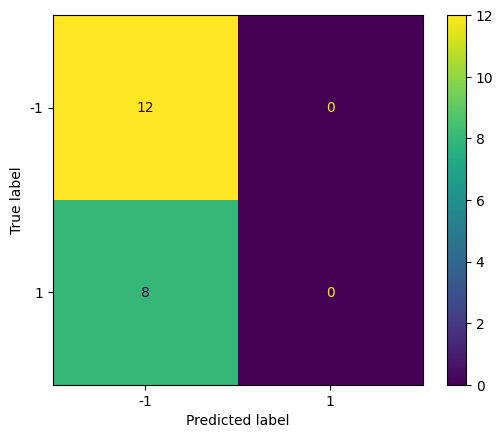

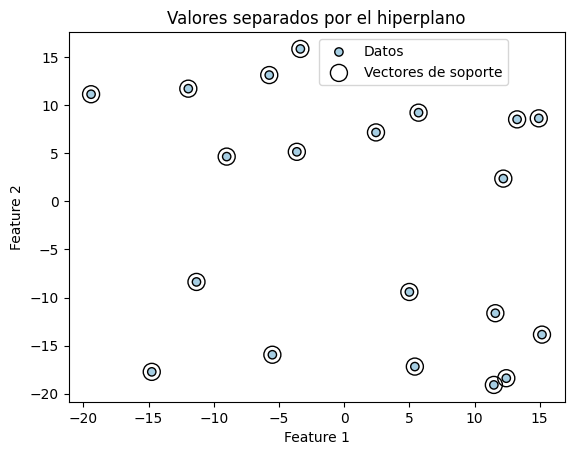

In [24]:
clasificador = SVM(kernel = "lineal")
clasificador.fit(X_parab, y_parab)
predicted = clasificador.predict(X_parab)
clasificador.plot_separating_hyperplane(predicted)


## Kernel polinomial - Datos de parábola

[[ 1.79091708e+05  1.17315070e+05  1.97494228e+05  7.13029388e+03
   1.93236372e+05  5.07735203e+02  1.17011647e+04 -4.30314090e+04
  -1.59600478e+03 -7.25104630e+04  1.14310300e+05  4.00227606e+04
   2.35994386e+04 -1.56969251e+04  2.00416792e+05  3.00883233e+03
  -3.72677362e+03 -7.17572528e+04 -1.03178264e+05 -1.91263631e+04]
 [ 1.17315070e+05  7.88666175e+04  1.31608891e+05  3.37154006e+03
   1.29262496e+05  8.92390662e+02  5.87942035e+03 -2.85767800e+04
  -1.63940034e+03 -5.12439838e+04  7.49238530e+04  2.65864577e+04
   1.37826989e+04 -1.09272261e+04  1.31941318e+05  1.47690016e+03
  -3.08025158e+03 -4.97891821e+04 -7.01036685e+04 -1.43252506e+04]
 [ 1.97494228e+05  1.31608891e+05  2.43664114e+05  9.18961073e+01
   2.44599804e+05  2.05071129e+04  7.99539513e+02 -5.58978990e+04
  -9.46226309e+03 -1.10076565e+05  1.28897915e+05  3.85786412e+04
   1.19971977e+04 -1.92169041e+04  1.97941585e+05  1.99148589e+02
  -1.00260541e+04 -9.70556146e+04 -1.47578419e+05 -5.08920281e+04]
 [ 7.13

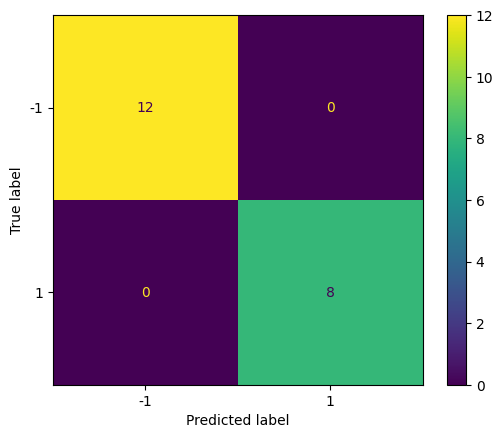

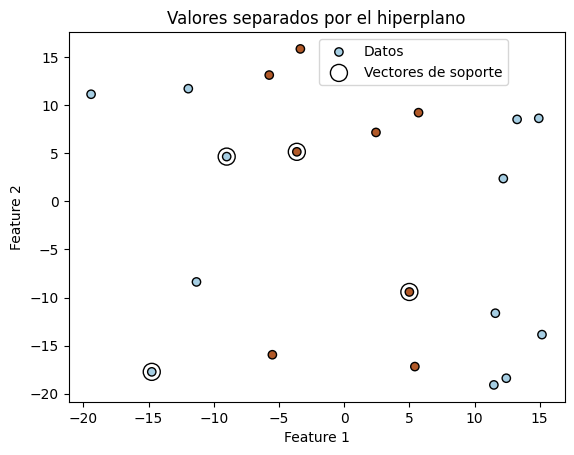

In [25]:
clasificador = SVM(kernel = "poly", degree = 2)
clasificador.fit(X_parab, y_parab)
predicted = clasificador.predict(X_parab)
clasificador.plot_separating_hyperplane(predicted)

## Asignación 4

Entrene un modelo de SVM (utilizando la clase implementada anteriormente) utilizando el dataset generado en la asignación 1 y un kernel de identidad. Grafique las predicciones de su modelo y marque los puntos que son vectores de soporte.

## Asignación 5

Entrene un modelo de SVM (utilizando la clase implementada anteriormente) utilizando el dataset generado en la asignación 2 y un kernel de RBF. Grafique las predicciones de su modelo y marque los puntos que son vectores de soporte.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dcae6c14-c366-4bf6-8d3d-fc998b9feae8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>